In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
import joblib

In [2]:
data = pd.read_csv('expresso_processed.csv')
data.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


In [3]:
ds = data.copy()
ds.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


In [4]:
ds.isnull().sum()

Unnamed: 0        0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
MRG               0
REGULARITY        0
CHURN             0
dtype: int64

In [5]:
ds.describe()

,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
count,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.00000,64376.000000,64376.000000
mean,16216.330620,5061.212812,10.630126,5173.670560,1724.561591,13.252718,3252.074189,218.65919,33.197496,0.456319
std,9501.522628,6777.622016,12.490926,6913.023944,2304.338459,13.988994,7841.567790,754.75000,20.432429,0.498092
min,0.000000,50.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,8046.750000,1000.000000,2.000000,1001.000000,334.000000,3.000000,1.000000,3.00000,14.000000,0.000000
50%,16093.500000,2900.000000,6.000000,2951.000000,984.000000,8.000000,507.000000,15.00000,32.000000,0.000000
75%,24140.250000,6500.000000,14.000000,6699.000000,2233.000000,18.000000,3156.000000,97.00000,54.000000,1.000000
max,34999.000000,286500.000000,133.000000,323541.000000,107847.000000,91.000000,283493.000000,25263.00000,62.000000,1.000000


In [6]:
cat = ds.select_dtypes(exclude='number')
num = ds.select_dtypes(include='number')

print('Categorical Data Values')
display(cat.head())
print('Numerical Data Values')
display(num.head())

Categorical Data Values


,TENURE,MRG
0,K > 24 month,NO
1,K > 24 month,NO
2,K > 24 month,NO
3,I 18-21 month,NO
4,K > 24 month,NO


Numerical Data Values


,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,0,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,32,1
1,1,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,29,1
2,2,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,49,1
3,3,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,1,1
4,4,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,21,1


In [7]:
ds.drop('Unnamed: 0', axis=1, inplace=True)
ds.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


<Axes: xlabel='CHURN', ylabel='count'>

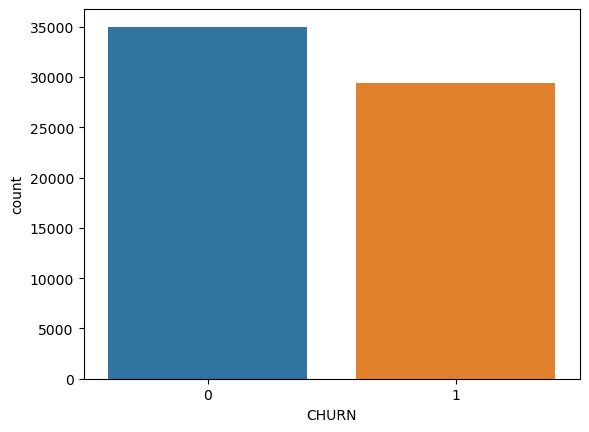

In [8]:
sns.countplot(x =ds['CHURN'])

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = {}
for i in cat.columns:
    encoded = LabelEncoder()
    ds[i] = encoded.fit_transform(ds[i])
    joblib.dump(encoded, open(f'{i}_encoder.pkl', 'wb'))
    encoder[i + '_encoder'] = encoded

In [10]:
toBeScaled = ['MONTANT', 'REVENUE', 'ARPU_SEGMENT', 'DATA_VOLUME']
scaling = {}
# .......... Instantiate your algorithm(Instantiation)

for i in toBeScaled:
    scaler = StandardScaler()
    data[i] = scaler.fit_transform(data[[i]])
    scaling[i + '_scaler'] = scaler
    joblib.dump(scaler, open(f'{i}_scaling.pkl', 'wb'))

scaling

{'MONTANT_scaler': StandardScaler(),
 'REVENUE_scaler': StandardScaler(),
 'ARPU_SEGMENT_scaler': StandardScaler(),
 'DATA_VOLUME_scaler': StandardScaler()}

In [11]:
from sklearn.model_selection import  train_test_split
x = ds.drop('CHURN', axis=1)
y = ds.CHURN

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.3, random_state=102)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression()
lr_model.fit(xtrain, ytrain)

cross_validation = lr_model.predict(xtrain)
print(classification_report(cross_validation, ytrain))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     24401
           1       0.75      0.74      0.75     20662

    accuracy                           0.77     45063
   macro avg       0.77      0.77      0.77     45063
weighted avg       0.77      0.77      0.77     45063



In [13]:
prediction = lr_model.predict(xtrain)
print(classification_report(prediction, ytrain))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     24401
           1       0.75      0.74      0.75     20662

    accuracy                           0.77     45063
   macro avg       0.77      0.77      0.77     45063
weighted avg       0.77      0.77      0.77     45063



In [ ]:
joblib.dump(lr_model, open('ExpressChurn.pkl', 'wb'))